In [ ]:
!pip install ultralytics >> None
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn, \
fasterrcnn_mobilenet_v3_large_fpn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Задача 1

Реализуйте детектор на основе предобученной модели Faster R-CNN (с backbone, которая там задана по умолчанию). Примените его на своем изображении с выводом названий классов вместо номера.

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained = True)
model.eval()
COCO_INSTANCE_CATEGORY_NAMES = [
    'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
    'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
    'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
    'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife',
    'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli',
    'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse',
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
    'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
    'hair drier', 'toothbrush'
]

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 85.5MB/s]


In [ ]:
image = Image.open('1790069.jpeg').convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image)

with torch.no_grad():
    prediction = model([image_tensor])[0]

prediction

{'boxes': tensor([[4.4674e+02, 2.6879e+02, 5.4297e+02, 3.8653e+02],
         [5.6395e+01, 1.2915e+02, 8.2483e+02, 6.4292e+02],
         [0.0000e+00, 3.2471e+02, 6.4262e+02, 6.6362e+02],
         [4.4224e+01, 2.2182e+02, 2.8177e+02, 4.3706e+02],
         [1.3836e+02, 2.4640e+02, 1.0050e+03, 6.5040e+02],
         [4.9180e+02, 2.2469e+02, 9.6355e+02, 4.9542e+02],
         [2.4688e-01, 3.8250e+02, 4.4313e+01, 4.5594e+02],
         [4.1612e+02, 2.2754e+02, 9.9040e+02, 5.4527e+02],
         [9.8823e+00, 2.5239e+02, 4.7043e+02, 6.7081e+02],
         [3.8278e+02, 3.1611e+02, 4.6242e+02, 3.4769e+02],
         [4.7446e+02, 3.8253e+02, 1.0126e+03, 6.6652e+02],
         [2.9374e+02, 3.4668e+02, 1.0211e+03, 6.6930e+02],
         [1.2605e+01, 4.3366e+02, 4.3117e+02, 6.6107e+02],
         [2.9227e+01, 2.1207e+02, 5.1524e+02, 4.6085e+02],
         [2.7930e+02, 1.7286e+02, 6.8810e+02, 5.2961e+02],
         [1.7756e+02, 1.2983e+02, 4.7631e+02, 3.8303e+02],
         [4.0764e-01, 3.8183e+02, 4.5343e+01, 4

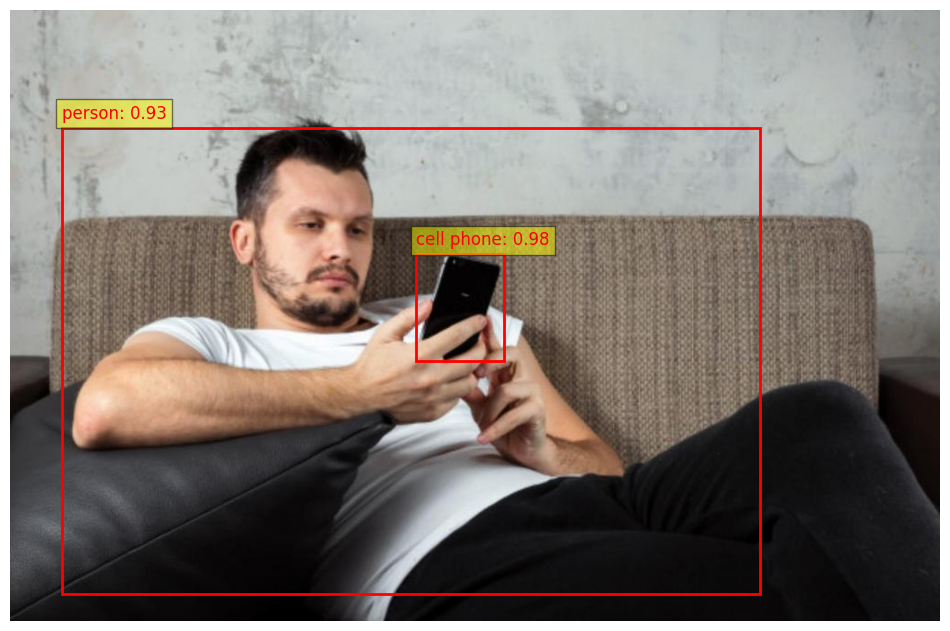

In [ ]:
score_threshold = 0.9

fig, ax = plt.subplots(1, figsize = (12, 8))
ax.imshow(image)

for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
    if score > score_threshold:
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth = 2, edgecolor = 'red', facecolor = 'none')
        ax.add_patch(rect)
        class_name = COCO_INSTANCE_CATEGORY_NAMES[label]
        ax.text(x1, y1 - 10, f'{class_name}: {score:.2f}', color = 'red',
                fontsize=12, bbox = dict(facecolor = 'yellow', alpha = 0.5))

plt.axis('off')
plt.show()

# Задача 2

Реализуйте детектор на основе предобученной модели Faster R-CNN с mobilenet в качестве backbone. Примените его на своем изображении с выводом названий классов вместо номера.

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_MobileNet_V3_Large_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_mobilenet_v3_large_fpn-fb6a3cc7.pth
100%|██████████| 74.2M/74.2M [00:01<00:00, 51.6MB/s]


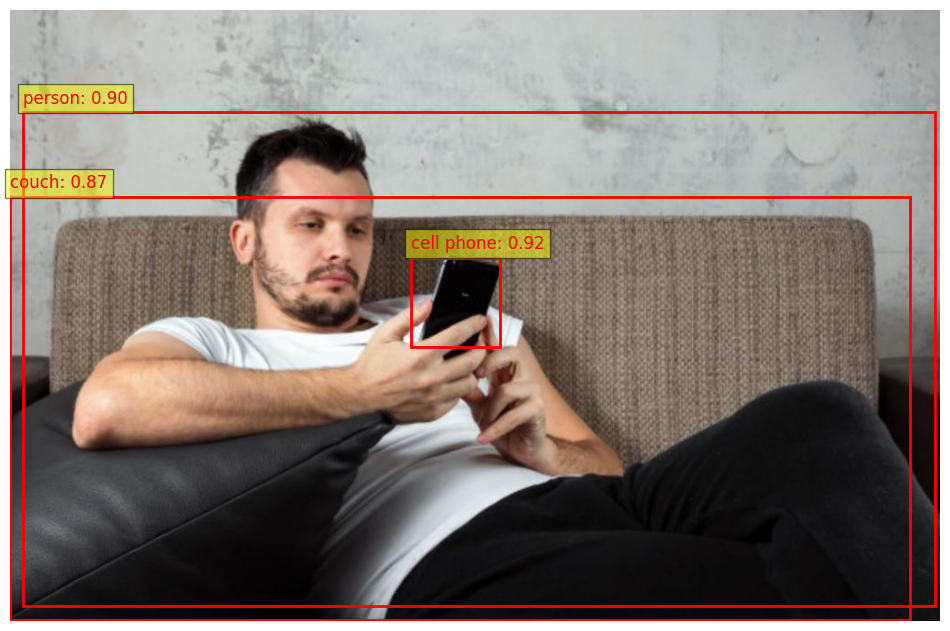

In [ ]:
model = fasterrcnn_mobilenet_v3_large_fpn(pretrained = True)
model.eval()

image = Image.open('1790069.jpeg').convert('RGB')
transform = transforms.Compose([
    transforms.ToTensor()
])
image_tensor = transform(image)

with torch.no_grad():
    prediction = model([image_tensor])[0]

score_threshold = 0.5

fig, ax = plt.subplots(1, figsize = (12, 8))
ax.imshow(image)

for box, label, score in zip(prediction['boxes'], prediction['labels'], prediction['scores']):
    if score > score_threshold:
        x1, y1, x2, y2 = box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth = 2, edgecolor = 'red', facecolor = 'none')
        ax.add_patch(rect)
        class_name = COCO_INSTANCE_CATEGORY_NAMES[label]
        ax.text(x1, y1 - 10, f'{class_name}: {score:.2f}', color = 'red',
                fontsize=12, bbox = dict(facecolor = 'yellow', alpha = 0.5))

plt.axis('off')
plt.show()

# Задача 3

Реализуйте детектор на основе предобученной модели YOLO (версию выберите какая вам нравится). Примените его на своем изображении с указанием порога уверенности confidence threshold.

100%|██████████| 6.25M/6.25M [00:00<00:00, 91.9MB/s]



image 1/1 /content/1790069.jpeg: 448x640 1 person, 1 couch, 1 cell phone, 342.6ms
Speed: 16.5ms preprocess, 342.6ms inference, 19.7ms postprocess per image at shape (1, 3, 448, 640)


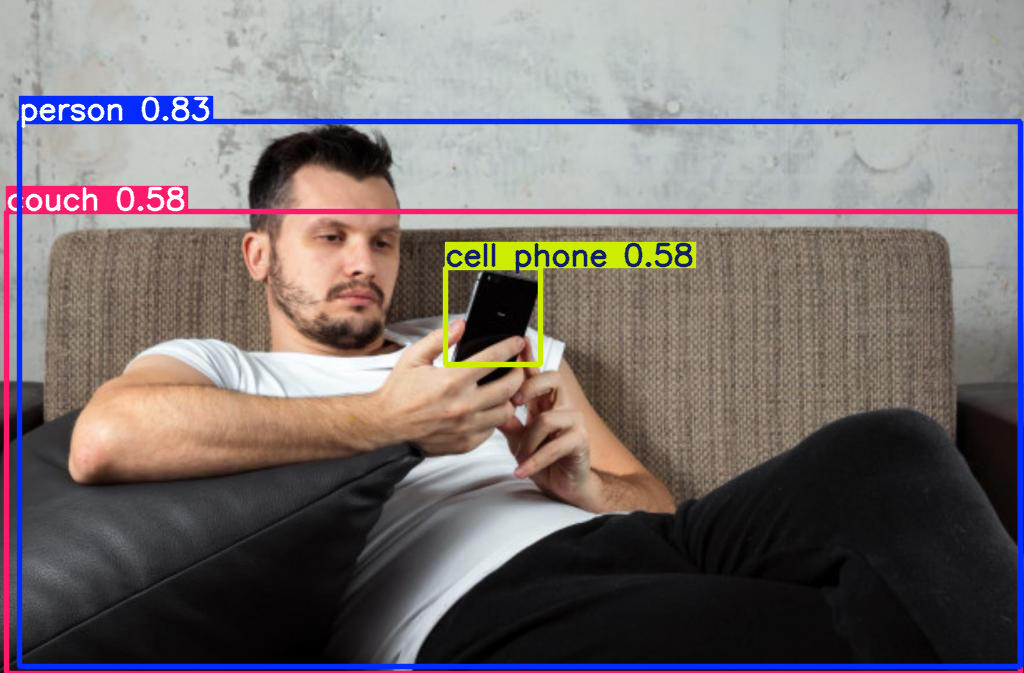

In [ ]:
model = YOLO('yolov8n.pt')
result = model('1790069.jpeg')
result[0].show()

WARNING ⚠️ best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolo11n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 5.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 3.8s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/1790069.jpeg: 448x640 1 telephone, 192.5ms
Speed: 5.7ms preprocess, 192.5ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


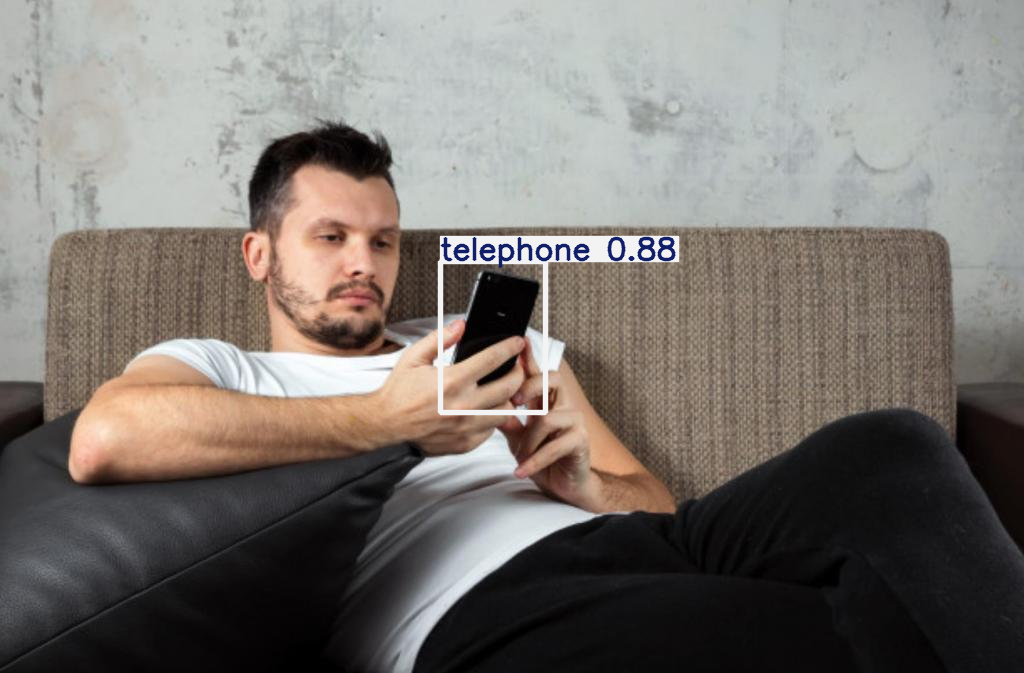

In [ ]:
model = YOLO('best.pt')
result = model('1790069.jpeg')
result[0].show()

https://github.com/MachineTrof/KaByte